In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

### Проверка скорости работы NumPy arrays

In [3]:
py_ar = range(1000)
%timeit [i**2 for i in py_ar]

num_ar =  np.arange(1000)
%timeit num_ar**2

201 µs ± 3.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.05 µs ± 20 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
%%time
num_ar =  np.arange(1000)
num_ar**2

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 31.5 µs


In [5]:
%%time
py_ar = range(1000)
[i**2 for i in py_ar]

CPU times: user 334 µs, sys: 2 µs, total: 336 µs
Wall time: 341 µs


### Помощь по библиотекам

In [6]:
# Вернуть количество измерений массива.
np.ndim?

In [7]:
# Выдает список подходящих функций/методов
np.con*?

### Creating arrays

##### 1D

In [8]:
a = np.array([0, 1, 2, 3, 4])
# a
# 
# a.ndim
# a.shape
len(a)

5

##### 2D-3D

In [9]:
c = np.array([[1, 2, 3], [4,5,6]])
# c
# c.shape
# c.ndim
# len(c)
d = np.array([[1,3,5], [7,7,7], [2,4,6]])
d
b = np.array([[[1],[2]],[[3],[4]]])
b.shape

(2, 2, 1)

#### Наполнение матриц

In [10]:
a = np.arange(10) # 0 .. n-1  (!)
b = np.arange(1, 9, 2) # start, end (exclusive), step
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[1 3 5 7]


In [11]:
c = np.linspace(0, 1, 6)   # start, end, num-points
d = np.linspace(0, 1, 5, endpoint=False)
print(c)
print(d)

[0.  0.2 0.4 0.6 0.8 1. ]
[0.  0.2 0.4 0.6 0.8]


In [12]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
b = np.zeros((2, 2))
c = np.eye(3)
d = np.diag(np.array([1, 2, 3, 4]))
print(a)
print(b)
print(c)
print(d)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0.]
 [0. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [13]:
a = np.random.rand(4)       # uniform in [0, 1]
b = np.random.randn(4)      # Gaussian
np.random.seed(1234)        # Setting the random seed
print(a)
print(b)

[0.95202934 0.84992668 0.21291692 0.0870106 ]
[-0.27212679  1.36234394 -0.58606668  0.97092253]


In [14]:
# Вернуть новый массив заданной формы и типа без инициализации записей.
np.empty

<function numpy.core.multiarray.empty>

In [15]:
a = np.array([1, 2, 3])
# покажет какой тип данных хранится в массиве
a.dtype

dtype('int64')

In [16]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

In [17]:
# Тип данных по умолчанию - с плавающей точкой
a = np.ones((3, 3))
a.dtype

dtype('float64')

## Визуализация

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline 

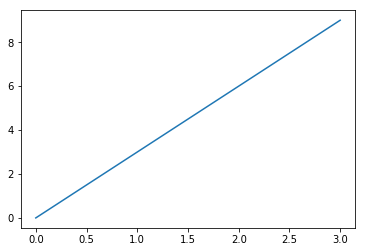

In [19]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)

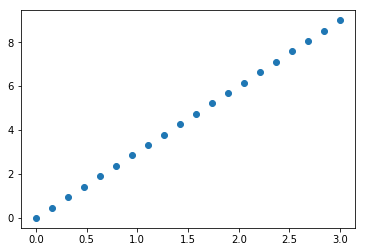

In [20]:
# Отрисовывает точки, а не линию
plt.plot(x, y, 'o')

### 2D массив

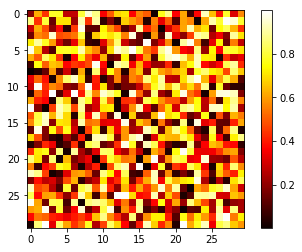

In [21]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot) 
plt.colorbar()  

## Индексирование и нарезка

In [22]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
a[0], a[2], a[-1]

(0, 2, 9)

In [24]:
# Вывод в обратную сторону, как и в Python
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Для многомерных массивов индексы являются кортежами целых чисел:

In [25]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [26]:
a[1, 1]

1

In [27]:
# меняем значение в 3-й строке, второго столбца
a[2, 1] = 10
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [28]:
# вывод второй строки
a[1]

array([0, 1, 0])

In [29]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
# [start:end:step]
a[2:9:3]

array([2, 5, 8])

In [31]:
# последний индекс не включен
a[0:4]

array([0, 1, 2, 3])

Все три компонента среза не обязательны: по умолчанию start - 0, end - последний, а step - 1:

![NumPy](numpy_indexing.png)

### Комбинирование срезов

In [32]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [33]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

### Using boolean masks

In [34]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [35]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [36]:
mask = (a % 3 == 0)
aa = a[mask] # or, a[a%3==0]
aa

array([ 3,  0,  9,  6,  0, 12])

Индексация по маске может быть очень полезна для назначения нового значения подмассиву:

In [37]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

Индексирование с помощью массива целых чисел

In [38]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [39]:
a[[2, 3, 2, 4, 2]] # [2, 3, 2, 4, 2] - обычный массив Python

array([20, 30, 20, 40, 20])

In [40]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

![NumPy](numpy_fancy_indexing.png)

# Числовые операции над массивами

### Элементарные операции

In [41]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [42]:
2**a

array([ 2,  4,  8, 16])

In [43]:
a**3

array([ 1,  8, 27, 64])

In [44]:
b = np.ones(4) + 2
a - b

array([-2., -1.,  0.,  1.])

In [45]:
a * b

array([ 3.,  6.,  9., 12.])

In [46]:
c = np.arange(5)
2**(c + 1) - c

array([ 2,  3,  6, 13, 28])

In [47]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [48]:
a > b

array([False, False,  True, False])

In [49]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [50]:
np.array_equal(a, c)

True